In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('D:\\GO IT\\Python\\6 заняття візуалізація\\facebook_ads_data (2.0).csv')
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


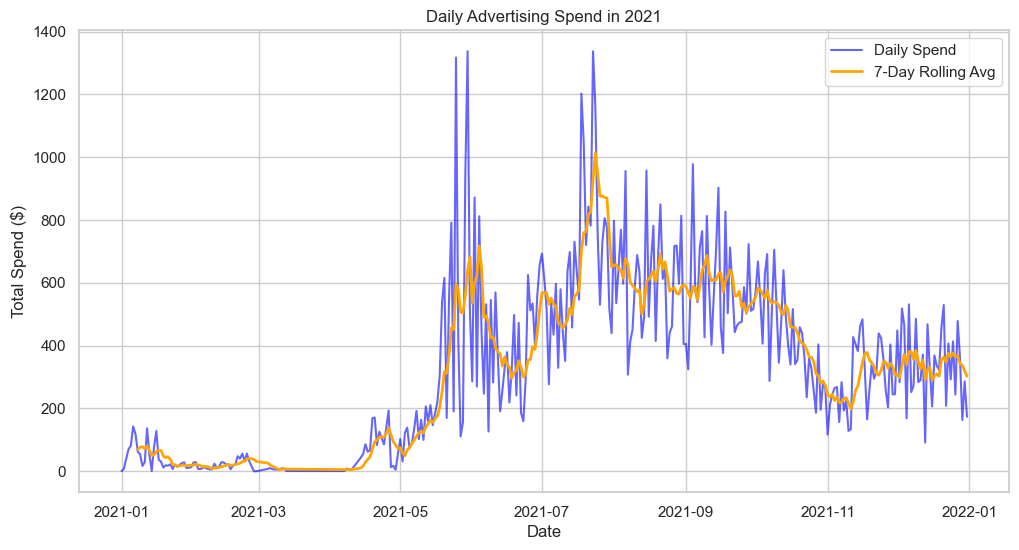

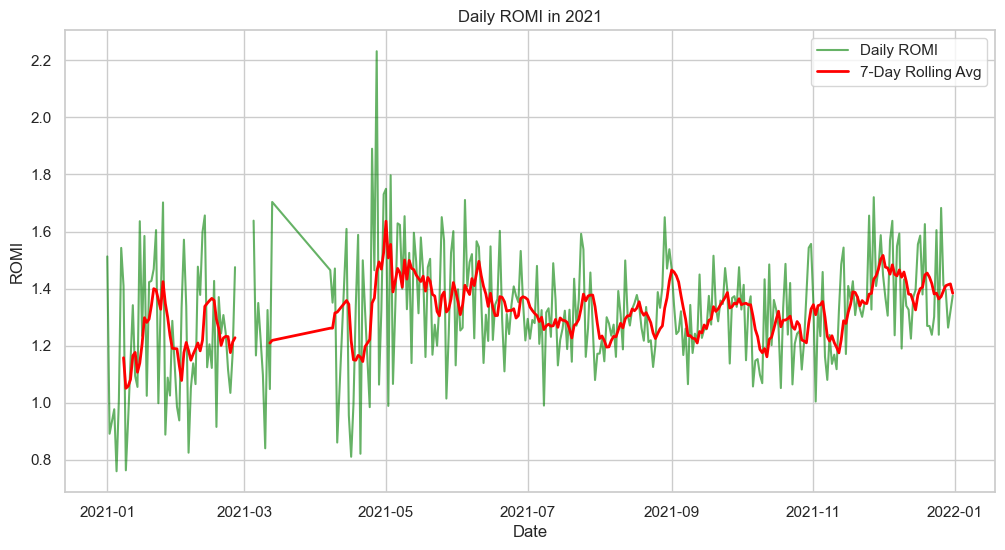

In [56]:
# 1.Завдання. Перетворення стовпця 'ad_date' у формат дати
df['ad_date'] = pd.to_datetime(df['ad_date'])

# Фільтрація даних за 2021 рік
df_2021 = df[df['ad_date'].dt.year == 2021]

# Групування даних по днях
daily_data = df_2021.groupby('ad_date').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()

# Розрахунок рухомого середнього
daily_data['spend_rolling'] = daily_data['total_spend'].rolling(window=7).mean()
daily_data['romi_rolling'] = daily_data['romi'].rolling(window=7).mean()

# Побудова графіка щоденних витрат
plt.figure(figsize=(12, 6))
plt.plot(daily_data['ad_date'], daily_data['total_spend'], label='Daily Spend', color='blue', alpha=0.6)
plt.plot(daily_data['ad_date'], daily_data['spend_rolling'], label='7-Day Rolling Avg', color='orange', linewidth=2)
plt.title('Daily Advertising Spend in 2021')
plt.xlabel('Date')
plt.ylabel('Total Spend ($)')
plt.legend()
plt.grid(True)
plt.show()

# Побудова графіка щоденного ROMI
plt.figure(figsize=(12, 6))
plt.plot(daily_data['ad_date'], daily_data['romi'], label='Daily ROMI', color='green', alpha=0.6)
plt.plot(daily_data['ad_date'], daily_data['romi_rolling'], label='7-Day Rolling Avg', color='red', linewidth=2)
plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.legend()
plt.grid(True)
plt.show()

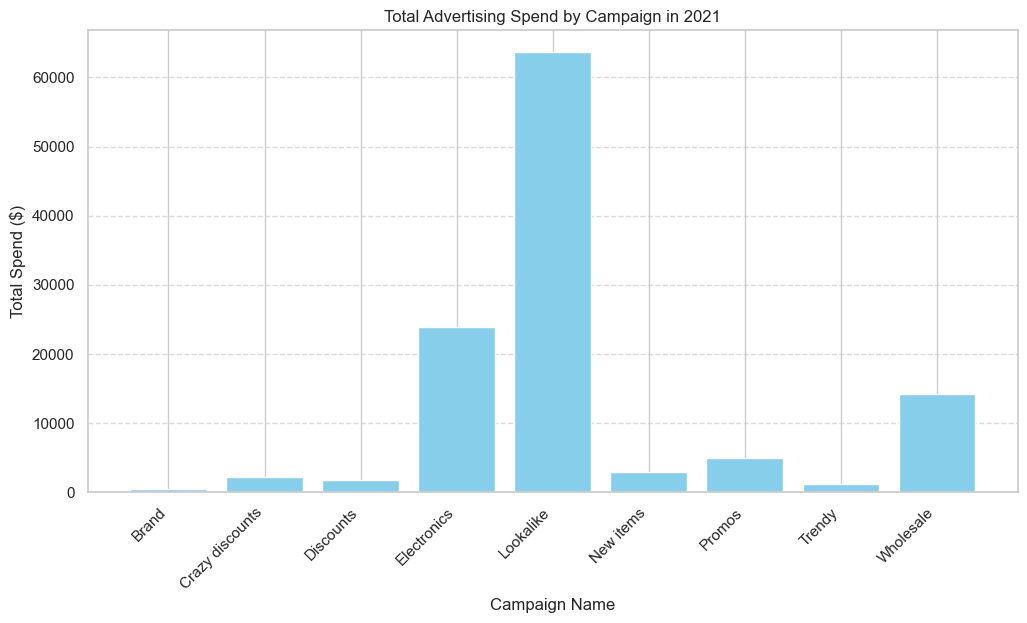

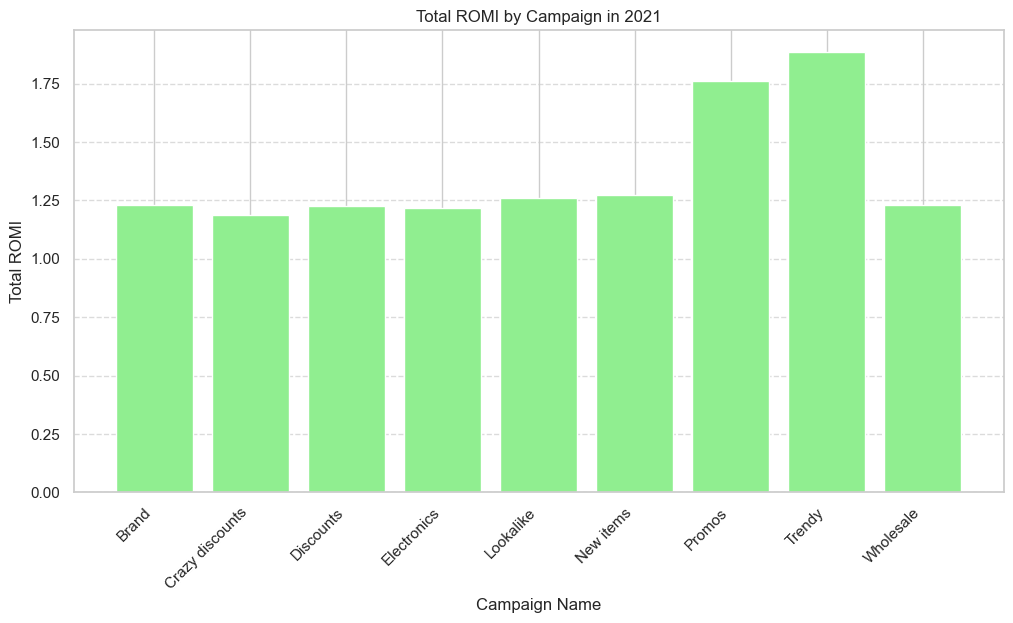

In [57]:
# 2 Завдання. Групування даних за назвою кампанії
campaign_data = df_2021.groupby('campaign_name').agg({
    'total_spend': 'sum', 
    'total_value': 'sum'
}).reset_index()

# Розрахунок загального ROMI для кожної кампанії
campaign_data['total_romi'] = campaign_data['total_value'] / campaign_data['total_spend']

# Побудова графіка загальної суми витрат на рекламу по кампаніях
plt.figure(figsize=(12, 6))
plt.bar(campaign_data['campaign_name'], campaign_data['total_spend'], color='skyblue')
plt.title('Total Advertising Spend by Campaign in 2021')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Побудова графіка загального ROMI по кампаніях
plt.figure(figsize=(12, 6))
plt.bar(campaign_data['campaign_name'], campaign_data['total_romi'], color='lightgreen')
plt.title('Total ROMI by Campaign in 2021')
plt.xlabel('Campaign Name')
plt.ylabel('Total ROMI')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

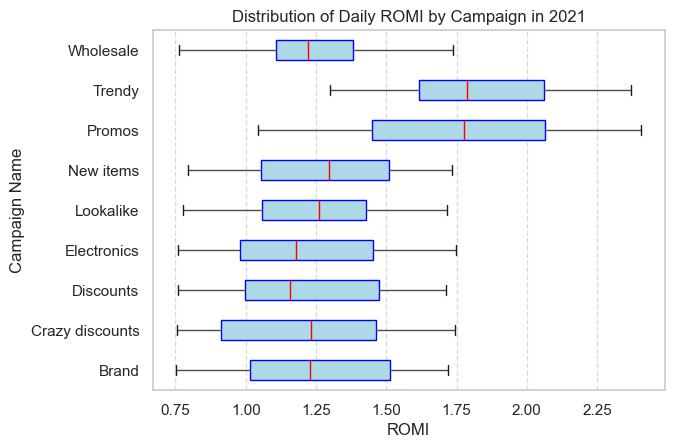

In [60]:
# 3. Побудова box plot для розкиду щоденного ROMI в кожній кампанії
plt.figure(figsize=(12, 6))
df_2021.boxplot(column='romi', by='campaign_name', grid=False, vert=False, patch_artist=True, 
                boxprops=dict(facecolor="lightblue", color="blue"), 
                medianprops=dict(color="red"))
plt.title('Distribution of Daily ROMI by Campaign in 2021')
plt.suptitle('')  # Remove the automatic subtitle
plt.xlabel('ROMI')
plt.ylabel('Campaign Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

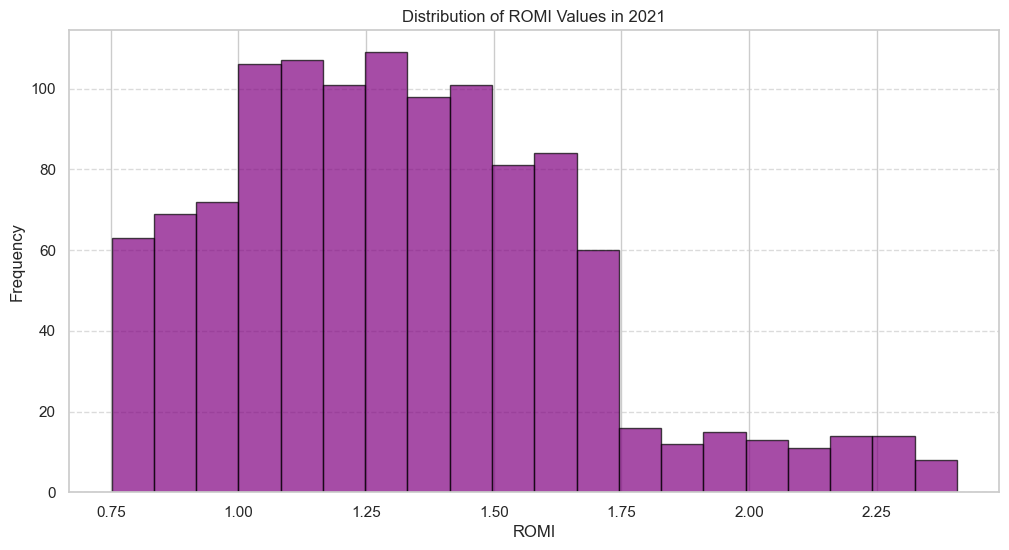

In [62]:
# 4. Побудова гістограми розподілу значень ROMI
plt.figure(figsize=(12, 6))
plt.hist(df_2021['romi'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of ROMI Values in 2021')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

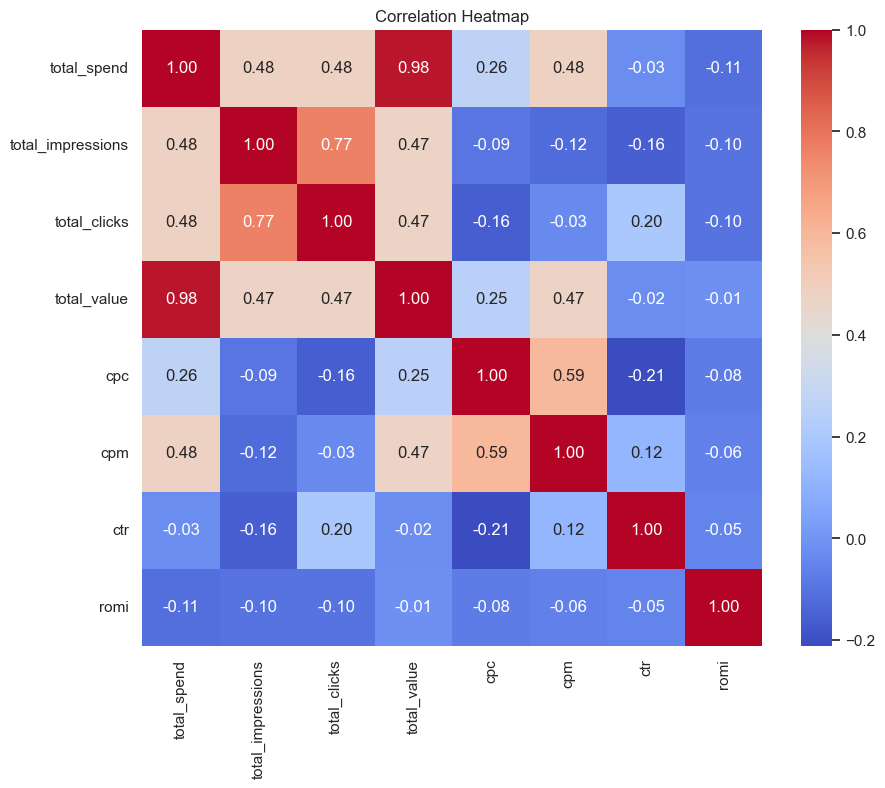

Найвища кореляція: ('total_spend', 'total_value') = 0.978889925874156
Найнижча кореляція: ('cpc', 'ctr') = -0.2107190927671994

Кореляція 'total_value':
 total_value          1.000000
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


In [64]:
# 5.
import pandas as pd
import seaborn as sns  # Seaborn для візуалізацій
import matplotlib.pyplot as plt  # Matplotlib для графіків

# Вибір лише числових стовпців
numeric_df = df.select_dtypes(include=['number'])

# Обчислення кореляційної матриці
correlation_matrix = numeric_df.corr()

# Побудова теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Пошук найбільшої та найменшої кореляції
max_corr = correlation_matrix.stack().loc[lambda x: x < 1].idxmax()  # Найвища кореляція (без 1.0)
min_corr = correlation_matrix.stack().loc[lambda x: x > -1].idxmin()  # Найнижча кореляція (без -1.0)

# Аналіз кореляції "total_value"
correlation_with_total_value = correlation_matrix['total_value'].sort_values(ascending=False)

# Результати
print("Найвища кореляція:", max_corr, "=", correlation_matrix.loc[max_corr])
print("Найнижча кореляція:", min_corr, "=", correlation_matrix.loc[min_corr])
print("\nКореляція 'total_value':\n", correlation_with_total_value)

<Figure size 1000x600 with 0 Axes>

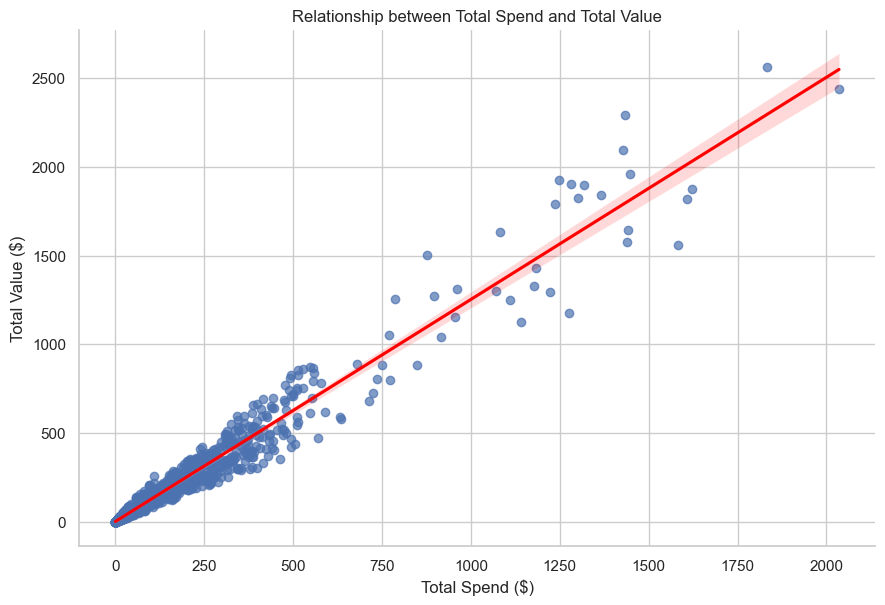

In [66]:
# 6. Вибір даних для побудови графіка
data = df[['total_spend', 'total_value']].dropna()  # Видаляємо рядки з відсутніми значеннями

# Побудова точкової діаграми з лінійною регресією
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lmplot(x="total_spend", y="total_value", data=data, height=6, aspect=1.5, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

# Налаштування графіка
plt.title("Relationship between Total Spend and Total Value")
plt.xlabel("Total Spend ($)")
plt.ylabel("Total Value ($)")
plt.grid(True)
plt.show()